In [ ]:
y_true = [0, 1, 1, 0, 1]
y_pred = [0, 1, 1, 1, 0]

# Accuracy (Exactitud):

> La exactitud es la proporción de predicciones correctas sobre el total de predicciones realizadas por el modelo.
>
> Se calcula como el número de predicciones correctas dividido por el número total de predicciones.
>
> Es una métrica útil cuando las clases están balanceadas en el conjunto de datos, es decir, cuando hay aproximadamente el mismo número de ejemplos en cada clase.

$$ \text{Accuracy} = \frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}} $$

In [ ]:
def accuracy(y_true, y_pred):
    correct = 0
    total = len(y_true)
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1
    return correct / total

# Precision (Precisión):

> La precisión es la proporción de ejemplos positivos correctamente identificados sobre el total de ejemplos identificados como positivos por el modelo.
>
> Se calcula como el número de verdaderos positivos dividido por la suma de verdaderos positivos y falsos positivos.
>
> La precisión es útil cuando el coste de los falsos positivos es alto, es decir, cuando es importante evitar clasificar incorrectamente ejemplos negativos como positivos.

$$ \text{Precision} = \frac{\text{Verdaderos positivos}}{\text{Verdaderos positivos} + \text{Falsos positivos}}
 $$

In [ ]:
def precision(y_true, y_pred):
    true_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 1)
    false_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 1)
    return true_positives / (true_positives + false_positives)

# Recall (Recuperación o Sensibilidad):

> El recall es la proporción de ejemplos positivos correctamente identificados sobre el total de ejemplos que realmente son positivos en el conjunto de datos.
>
> Se calcula como el número de verdaderos positivos dividido por la suma de verdaderos positivos y falsos negativos.
>
> El recall es útil cuando el coste de los falsos negativos es alto, es decir, cuando es importante evitar clasificar incorrectamente ejemplos positivos como negativos.

$$ \text{Recall} = \frac{\text{Verdaderos positivos}}{\text{Verdaderos positivos} + \text{Falsos negativos}}
 $$

In [ ]:
def recall(y_true, y_pred):
    true_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 1)
    false_negatives = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 0)
    return true_positives / (true_positives + false_negatives)

##F1-score:

>El F1-score es la media armónica entre precisión y recall. Es una métrica que equilibra ambas métricas.
>
> Se calcula como 2 * (precision * recall) / (precision + recall).
>
> Es útil cuando hay un desequilibrio entre las clases en el conjunto de datos y se quiere tener en cuenta tanto la precisión como el recall.
$$ \text{F1-score} = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}
$$

In [ ]:
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec)

##F2-score:

>El F2-score es similar al F1-score, pero pone más énfasis en el recall que en la precisión. Es útil cuando el recall es una métrica más importante que la precisión.
>
> Se calcula de manera similar al F1-score, pero utiliza un factor de ponderación más alto para el recall.
$$ \text{F2-score} = (1 + \beta^2) \times \frac{\text{Precisión} \times \text{Recall}}{\beta^2 \times \text{Precisión} + \text{Recall}}
$$

In [ ]:
def f2_score(y_true, y_pred):
    beta = 2
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return (1 + beta**2) * (prec * rec) / ((beta**2 * prec) + rec)

In [ ]:
def fbeta_score(y_true, y_pred,beta):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return (1 + beta**2) * (prec * rec) / ((beta**2 * prec) + rec)

In [ ]:
print("Nosotros: ")
print("accuracy", accuracy(y_true, y_pred))
print("precision", precision(y_true, y_pred))
print("recall", recall(y_true, y_pred))
print("f1_score", f1_score(y_true, y_pred))
print("f2_score", f2_score(y_true, y_pred))

Nosotros: 
accuracy 0.8
precision 0.75
recall 1.0
f1_score 0.8571428571428571
f2_score 0.9375


In [ ]:
print("f5_score",fbeta_score(y_true,y_pred,5))

f5_score 0.9873417721518988


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

def evaluate_performance(y_true, y_pred):
    print("accuracy", accuracy_score(y_true, y_pred))
    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("f1_score", f1_score(y_true, y_pred))
    print("f2_score", fbeta_score(y_true, y_pred, beta=2))  # f2-score
evaluate_performance(y_true,y_pred)

accuracy 0.8
precision 0.75
recall 1.0
f1_score 0.8571428571428571
f2_score 0.9375


# Curva ROC (Receiver Operating Characteristic):
La curva ROC es una representación gráfica de la sensibilidad (verdaderos positivos) frente a la tasa de falsos positivos. Se calcula trazando la tasa de verdaderos positivos (sensibilidad) en el eje Y y la tasa de falsos positivos (1 - especificidad) en el eje X. El área bajo la curva (AUC) se utiliza como una medida de la capacidad predictiva del modelo.

La curva ROC es útil cuando estamos interesados en evaluar el rendimiento de un modelo clasificador en diferentes umbrales de decisión y cuando el equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos es importante. Por ejemplo, en problemas de clasificación binaria donde el equilibrio entre la sensibilidad y la especificidad es crucial, como en la detección de fraudes en transacciones financieras.




In [ ]:
from sklearn.metrics import roc_curve, auc

def roc_curve_auc(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Curva PR (Precision-Recall):

La curva PR es una representación gráfica de la precisión frente a la exhaustividad. Se calcula trazando la precisión en el eje Y y la exhaustividad en el eje X. El área bajo la curva (AUC) PR se utiliza como una medida de la capacidad predictiva del modelo, especialmente cuando hay desequilibrios de clase en los datos.

La curva PR es útil cuando el conjunto de datos está desequilibrado, es decir, cuando una clase es mucho más frecuente que la otra. Es especialmente útil en problemas donde la identificación de verdaderos positivos es más importante que la identificación de falsos positivos. Por ejemplo, en problemas de detección de spam de correo electrónico, donde la identificación de todos los correos electrónicos de spam (alta exhaustividad) es más importante que evitar la clasificación incorrecta de algunos correos electrónicos legítimos como spam (baja precisión).


In [ ]:
from sklearn.metrics import  auc, precision_recall_curve

def precision_recall_auc(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall, precision)
    return precision, recall, pr_auc

In [ ]:
fpr, tpr, roc_auc = roc_curve_auc(y_true, y_pred)
precision, recall, pr_auc = precision_recall_auc(y_true, y_pred)

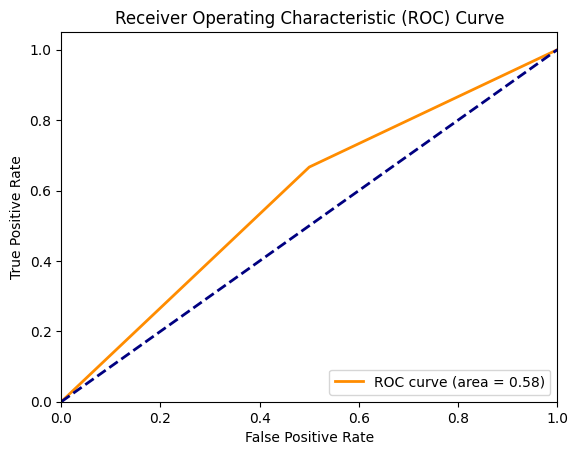

In [ ]:
import matplotlib.pyplot as plt

# Graficamos la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



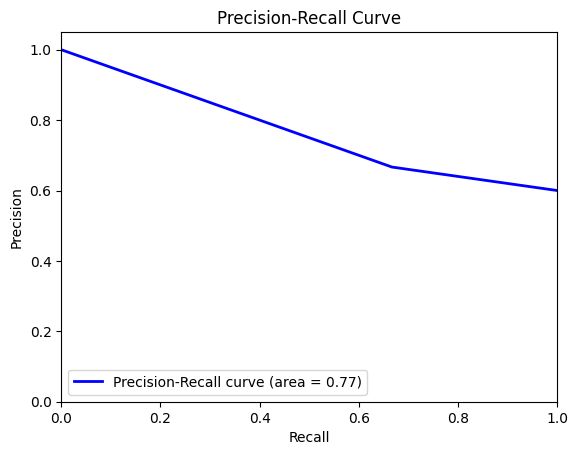

In [ ]:
# Graficamos la curva PR
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()